<a href="https://colab.research.google.com/github/ninacchagas/pandas_alura/blob/main/python_pandas_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9# Relatório de Análise I

Importando a base de dados

In [140]:
import pandas as pd

In [141]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alura Pandas Data/aluguel.csv", sep=";")

In [142]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [143]:
type(df)

pandas.core.frame.DataFrame

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


## Informações gerais sobre a base de dados

In [145]:
df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [146]:
tipos_dados = pd.DataFrame(df.dtypes, columns = ['Tipos de dados'])

In [147]:
tipos_dados.columns.name = 'Variaveis'

In [148]:
tipos_dados

Variaveis,Tipos de dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [149]:
df.shape

(32960, 9)

In [150]:
print('A base de dados apresenta {} registros (imóveis) e {} variáveis'.format(df.shape[0], df.shape[1]))

A base de dados apresenta 32960 registros (imóveis) e 9 variáveis


## Relatório de Análise II

## Series e Index

Suponhamos que a pessoa para qual trabalhamos fez um pedido de que deixassem na base de dados apenas os imóveis residenciais.

* Identificar todos os tipos de imóveis na base

In [151]:
# Removendo valores repetidos

df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [152]:
# Selecionar uma variável no pandas
df.Tipo

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [153]:
tipo_de_imovel = df.Tipo

tipo_de_imovel

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [154]:
type(tipo_de_imovel)

pandas.core.series.Series

Como podemos ver, o tipo da variável acima é uma Series. E o que é uma Series?
Basicamente, é como se fosse um array unidimensional.

In [155]:
# Identificar quais imóveis possuem. Aqui, usamos o método drop_duplicates, que como o nome sugere
# irá dropar as duplicadas da Series que criamos acima.

tipo_de_imovel.drop_duplicates()

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [156]:
tipo_de_imovel.drop_duplicates(inplace = True)

## Redefinindo o Index: organizando a visualização

In [157]:
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)

In [158]:
tipo_de_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [159]:
# Modificando o índice
# Visualizando os índices

tipo_de_imovel.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [160]:
tipo_de_imovel.shape[0]

22

In [161]:
range(tipo_de_imovel.shape[0])

range(0, 22)

In [162]:
for i in range(tipo_de_imovel.shape[0]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [163]:
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])

In [164]:
tipo_de_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [165]:
tipo_de_imovel.index

RangeIndex(start=0, stop=22, step=1)

In [166]:
tipo_de_imovel.columns.name = 'ID'

In [167]:
tipo_de_imovel

ID,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


## Filtrando dados

Para mim foi pedido que fosse criada uma nova base de dados que contivessem apenas dados de imóveis residenciais.

# Relatório de Análise III

In [168]:
# Removendo os imóveis não-residenciais

list(df.Tipo.drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [169]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila']

In [170]:
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [171]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [172]:
selecao = df['Tipo'].isin(residencial)

In [173]:
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [174]:
# Seleção de dataframe

df_res = df[selecao]

In [175]:
df_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [176]:
list(df_res['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [177]:
df_res.shape[0]

22580

In [178]:
df.shape[0]

32960

In [179]:
df_res.index = range(df_res.shape[0])

In [180]:
df_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [181]:
# Exportando uma base de dados
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/Alura Pandas Data/aluguel_residencial.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Frequências de imóveis

# Relatório de Análise IV

### Seleções e frequências

In [182]:
# Seleções e frequências

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alura Pandas Data/aluguel_residencial.csv")

In [183]:
df

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...,...
32955,32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [184]:
#Selecione somente os imóveis classificados com tipo 'Apartamento'.
#Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
#Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
#Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.


In [185]:
selecao = df['Tipo'] == 'Apartamento'

In [186]:
selecao

0        False
1        False
2        False
3         True
4         True
         ...  
32955    False
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [187]:
n1 = df[selecao].shape[0]

In [188]:
n1

19532

In [189]:
# Casa, casa de condomínio, casa de vila

selecao = (df['Tipo'] == 'Casa') | (df['Tipo'] == 'Casa de Condomínio') | (df['Tipo'] == 'Casa de Vila')

In [190]:
n2 = df[selecao].shape[0]

In [191]:
n2

2212

In [192]:
# Selecionar imóveis com área entre 60 e 100 metros quadrados, incluindo limites
# É equivalente falar que: 60<=Area<=100

selecao = (df['Area'] >= 60) & (df['Area']<=100)
n3 = df[selecao].shape[0]
n3

10187

In [193]:
# Pelo menos 4 quartos e aluguel < 2000

selecao = (df['Quartos'] >= 4) & (df['Valor'] < 2000)
n4 = df[selecao].shape[0]

In [194]:
n4

43

In [195]:
print(f'Imóveis classificados como apartamento: {n1}')
print(f'Imóveis classificados como casa, casa de vila, casa de condomínio: {n2}')
print(f'Imóveis com área maior ou igual a 60 e menor ou igual a 100: {n3}')
print(f'Imóveis com quatro ou mais quartos e aluguel menos que R$ 2000,00: {n4}')

Imóveis classificados como apartamento: 19532
Imóveis classificados como casa, casa de vila, casa de condomínio: 2212
Imóveis com área maior ou igual a 60 e menor ou igual a 100: 10187
Imóveis com quatro ou mais quartos e aluguel menos que R$ 2000,00: 43


## Tratando de dados faltantes

### Tratando valores nulos

# Relatório de Análise V
## Tratamento de dados faltantes

In [196]:
# Tratando dados faltantes

df_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [197]:
# Existem dois métodos que nos ajudam com missings

df_res.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [198]:
df_res.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


In [199]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [200]:
# Selecionar valores onde epecificamente e têm variáve nulas. Neste caso, estamos verificando se 'Valor' possui alhum valor nulo.

df_res[df_res['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [201]:
# Eliminando VALORES nulos do DF

A = df_res.shape[0]

df_res.dropna(subset = ['Valor'], inplace = True)

B = df_res.shape[0]

A - B

<ipython-input-201-eec0bd2519d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res.dropna(subset = ['Valor'], inplace = True)


9

In [202]:
df_res[df_res['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [203]:
# Tratar o condomínio e o IPTU que possuem valores nulos
# Condomínio: se for apartamento e tiver condomínio nulo, vamos dropar

df_res[df_res['Condominio'].isnull()].shape[0]

1813

In [204]:
# Dropando aptos com condominio nulo

selecao = (df_res['Tipo']=='Apartamento') & (df_res['Condominio'].isnull())

A = df_res.shape[0]

df_res = df_res[~selecao]
B = df_res.shape[0]

A - B

745

In [205]:
df_res[df_res['Condominio'].isnull()].shape[0]

1068

In [206]:
df_res.fillna(0, inplace = True)

<ipython-input-206-e7feb6892611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res.fillna(0, inplace = True)


In [207]:
df_res[df_res['Condominio'].isnull()].shape[0]

0

In [208]:
df_res[df_res['IPTU'].isnull()].shape[0]

0

In [209]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [210]:
# Substituir arquivo
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

path = '/content/drive/MyDrive/Colab Notebooks/Alura Pandas Data/aluguel_residencial.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Mounted at /content/drive


## Criando novas variaveis
### Valor bruto, valor bruto por metro quadrado, e criar uma nova variável chamada Casa e Apartamento

### Relatório de Análise VI

In [211]:
# Criando novas variáveis

df_res.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [212]:
# Valor Bruto

df_res['Valor Bruto'] = df_res['Valor'] + df_res['Condominio'] + df_res['IPTU']

df_res.head(10)

<ipython-input-212-fe40ce73f673>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['Valor Bruto'] = df_res['Valor'] + df_res['Condominio'] + df_res['IPTU']


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0


In [213]:
df_res['Valor m2'] = (df_res['Valor']/df_res['Area']).round(2)

df_res.head(10)

<ipython-input-213-ae8e4d9d9e81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['Valor m2'] = (df_res['Valor']/df_res['Area']).round(2)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00


In [214]:
df_res['Valor Bruto m2'] = (df_res['Valor Bruto'] / df_res['Area']).round(2)

df_res.head(10)

<ipython-input-214-a12a702640fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['Valor Bruto m2'] = (df_res['Valor Bruto'] / df_res['Area']).round(2)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28


In [215]:
# Pegar a variável tipo, identificar o que tem casa no nome e marca apenas como Casa, e a mesma coisa para APTO
# Usando função lambda
# Lista com casas

casa = ['Casa', 'Casa de Vila', 'Casa de Condomínio']

In [216]:
# Nova variável

df_res['Tipo Agregado'] = df_res['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

<ipython-input-216-3dfd15ec8b0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['Tipo Agregado'] = df_res['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')


In [217]:
df_res.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Casa
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartamento


In [218]:
# A variável IPTU tem tendência a ser um problema, por isso, excluiremos uma variável:
# Excluindo Valor Bruto e Valor Bruto m2

df_res.drop(['Valor Bruto', 'Valor Bruto m2'], axis=1, inplace = True)

df_res.head(10)

<ipython-input-218-ca0b69355e04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res.drop(['Valor Bruto', 'Valor Bruto m2'], axis=1, inplace = True)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [219]:
# Substituir arquivo
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

path = '/content/drive/MyDrive/Colab Notebooks/Alura Pandas Data/aluguel_residencial.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Mounted at /content/drive


In [220]:
df_res

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


## Estatísticas Descritivas

### Relatório de Análise VII

In [221]:
df_res['Valor'].mean()

5046.172821405663

In [222]:
# Média segundo tipos de variável
# Valor médio do aluguel por bairro

bairro = df_res['Bairro'].unique()

bairro

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Piedade', 'Lagoa', 'Catete', 'Jardim Carioca',
       'Benfica', 'Glória', 'Praça Seca', 'Vila Isabel', 'Engenho Novo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Jardim Sulacap', 'Oswaldo Cruz',
       'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Quintino Bocaiúva', 'Urca', 'Penha',

In [223]:
selecao = df_res['Bairro'].isin(bairro)

df_res = df_res[selecao]

df_res['Bairro'].drop_duplicates()

0             Copacabana
1        Jardim Botânico
2                 Centro
3           Higienópolis
5               Cachambi
              ...       
14334          Bancários
15803         Cavalcanti
15806       Rio da Prata
15940      Cidade Jardim
16994        Coelho Neto
Name: Bairro, Length: 152, dtype: object

In [224]:
# Criando um grupo

grupo_bairro = df_res.groupby('Bairro')

In [225]:
grupo_bairro

In [226]:
grupo_bairro.groups

{'Abolição': [1596, 3283, 6883, 7190, 7899, 10500, 13617, 14679, 16608, 17210, 17733, 19450, 19458, 20802, 22130], 'Alto da Boa Vista': [2270, 12452, 12988, 13699, 13905, 15018], 'Anchieta': [3112, 9188, 16198, 18434], 'Andaraí': [395, 464, 529, 631, 813, 870, 878, 1026, 1225, 1455, 1460, 1735, 1968, 2076, 2764, 3234, 3315, 3598, 3691, 3860, 3982, 4365, 4721, 4927, 5035, 5042, 5122, 5731, 5947, 6193, 6444, 6669, 6753, 7150, 7417, 7667, 8162, 8163, 8342, 8723, 9506, 9611, 9655, 9706, 10059, 10279, 10463, 10622, 10643, 11241, 11324, 11331, 11467, 11918, 12227, 12714, 13202, 13703, 13850, 13854, 14247, 14377, 14412, 14419, 14706, 15093, 15169, 16461, 16561, 17071, 17076, 17168, 17225, 18121, 18391, 18417, 18540, 18848, 19076, 19405, 19544, 19574, 19701, 20345, 20430, 20450, 20796, 20917, 21226, 21586, 21759, 21805, 21847, 22068, 22200, 22291, 22332], 'Anil': [251, 588, 622, 1262, 1678, 1713, 1844, 1988, 2192, 2451, 3699, 3794, 3986, 4290, 4511, 4800, 4923, 4945, 5437, 5517, 5852, 6337, 63

In [227]:
for bairro, data in grupo_bairro:
  print(f'{bairro} -> {data.Valor.mean().round(2)}')

Abolição -> 1195.33
Alto da Boa Vista -> 3966.67
Anchieta -> 875.0
Andaraí -> 1464.71
Anil -> 2048.87
Arpoador -> 12923.92
Bancários -> 1825.0
Bangu -> 1016.0
Barra da Tijuca -> 7069.55
Barra de Guaratiba -> 5550.0
Benfica -> 996.0
Bento Ribeiro -> 1030.87
Bonsucesso -> 1225.93
Botafogo -> 8791.83
Braz de Pina -> 1115.0
Cachambi -> 1157.17
Cachamorra -> 3000.0
Cacuia -> 916.67
Caju -> 850.0
Camorim -> 1735.23
Campinho -> 1037.33
Campo Grande -> 1267.72
Cascadura -> 948.71
Catete -> 2267.06
Catumbi -> 1112.5
Cavalcanti -> 595.0
Centro -> 1254.75
Cidade Jardim -> 12000.0
Cidade Nova -> 1471.43
Cocotá -> 1883.33
Coelho Neto -> 700.0
Colégio -> 885.0
Copacabana -> 4126.68
Cordovil -> 905.56
Cosme Velho -> 5343.55
Cosmos -> 658.33
Curicica -> 1514.57
Del Castilho -> 1261.3
Encantado -> 1050.0
Engenho Novo -> 1035.83
Engenho da Rainha -> 883.57
Engenho de Dentro -> 1166.35
Estácio -> 1233.91
Flamengo -> 4113.53
Freguesia (Ilha do Governador) -> 1720.0
Freguesia (Jacarepaguá) -> 4966.67
Fátim

In [228]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


In [230]:
# Estatísticas descritivas

df_res.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [232]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [233]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [234]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Valor mínimo', 'max': 'Valor máximo', 'sum': 'Soma'})

,Valor mínimo,Valor máximo,Soma
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [235]:
# Facilitar visualização
# Matplolib

import matplotlib.pyplot as plt

In [236]:
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor médio por bairro')

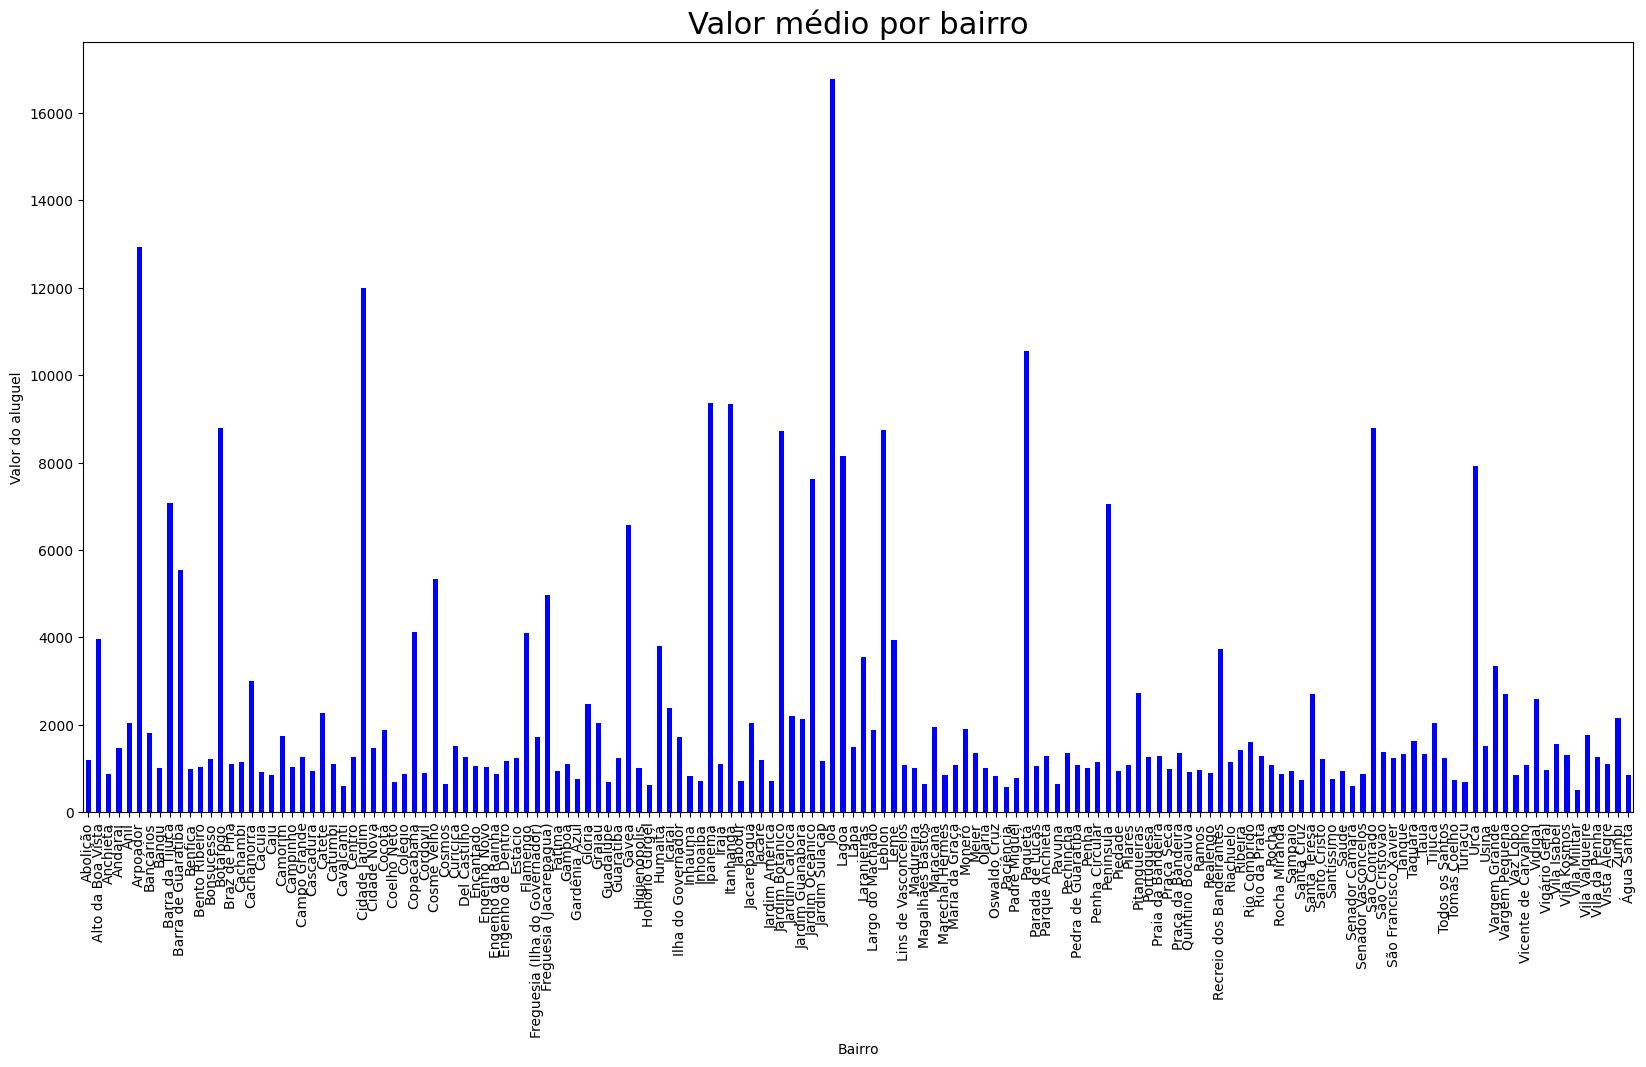

In [238]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio por bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor máximo por bairro')

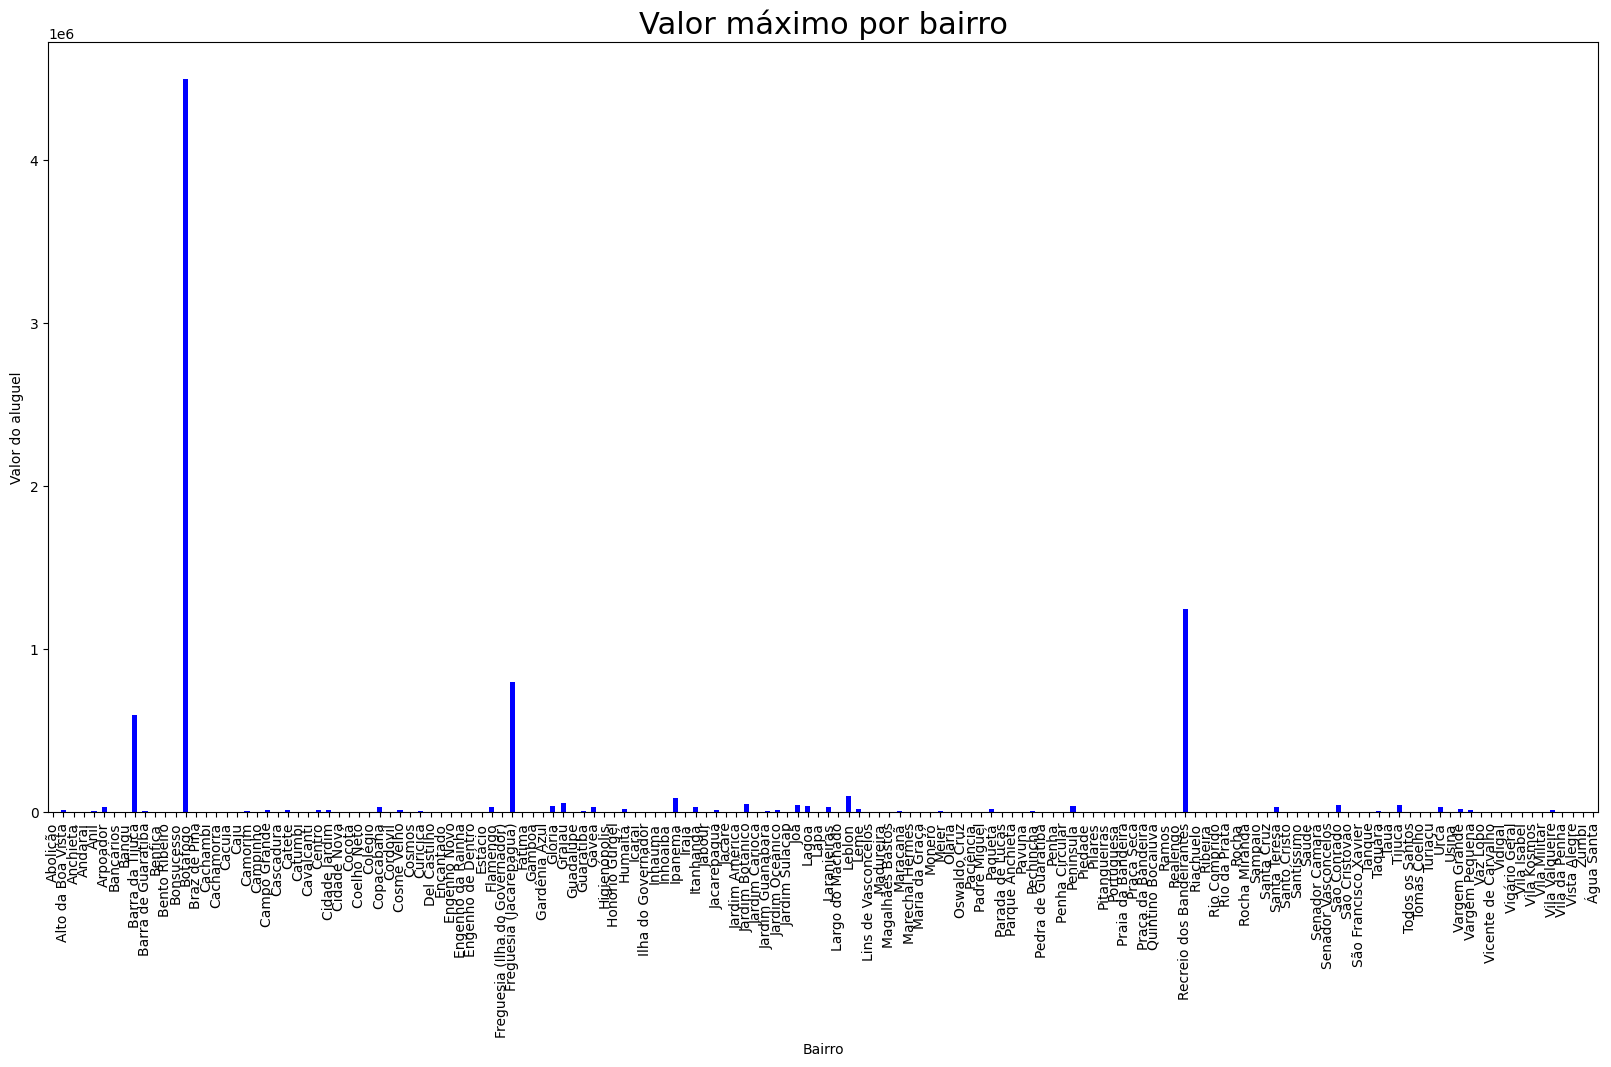

In [240]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor máximo por bairro', {'fontsize': 22})

# Removendo Outliers

## Identificando e removendo outliers

### Relatório de Análise VIII

In [241]:
plt.rc('figure', figsize = (14,6))

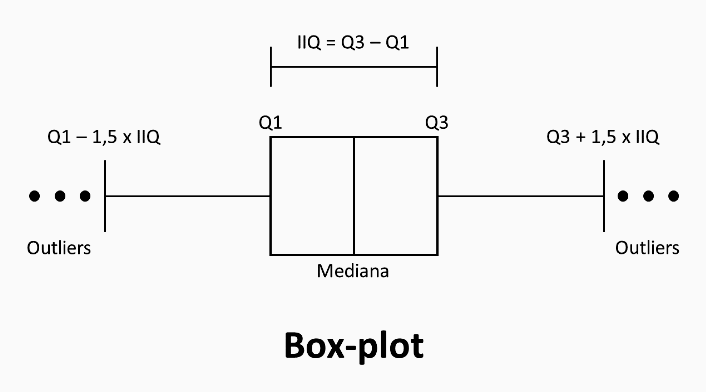

<Axes: >

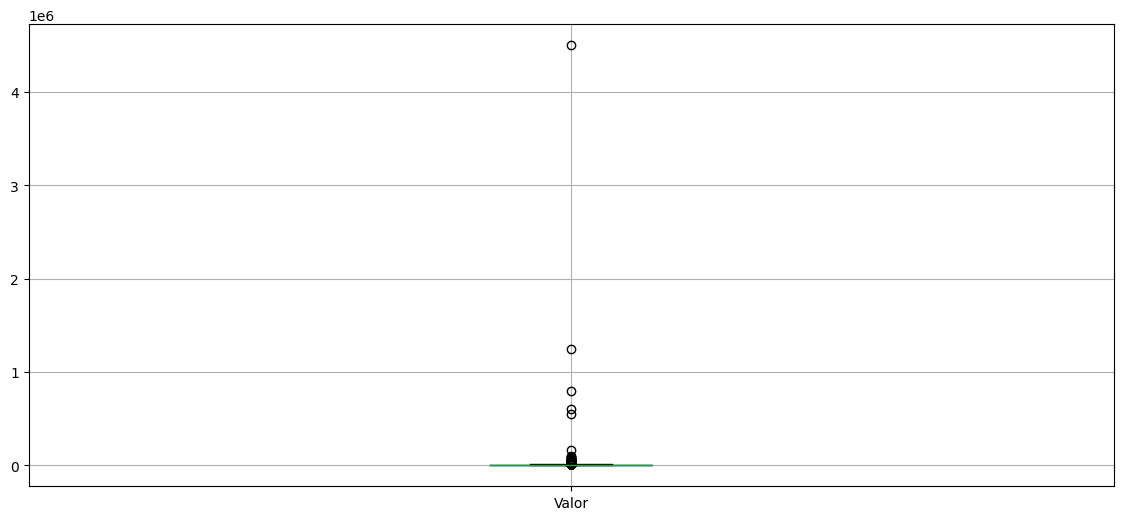

In [242]:
df_res.boxplot(['Valor'])

In [243]:
df_res[df_res['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [244]:
valor = df_res['Valor']

In [248]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [249]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [250]:
dados_new = df_res[selecao]

In [251]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<Axes: >

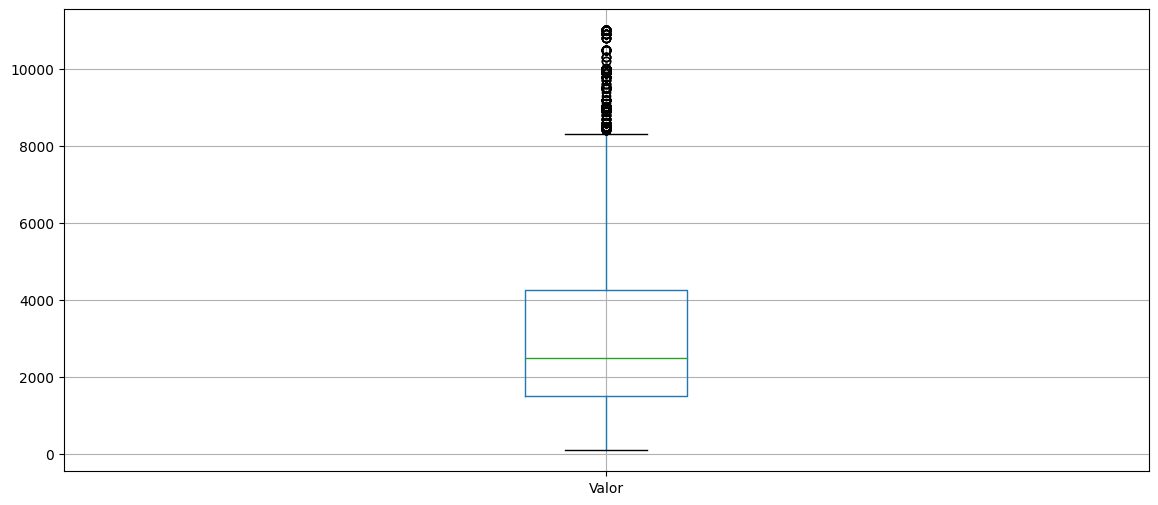

In [252]:
dados_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

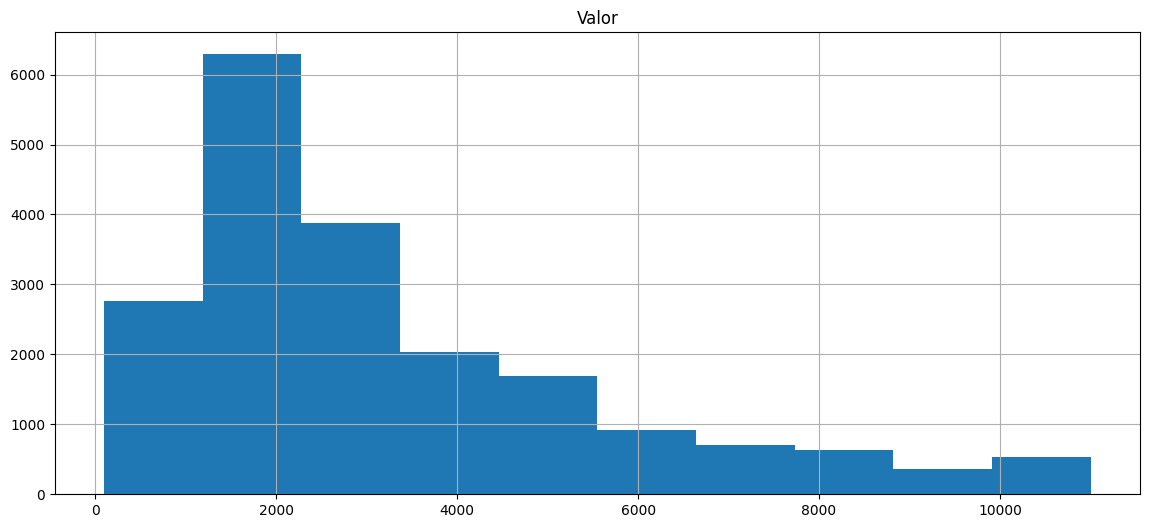

In [253]:
dados_new.hist(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

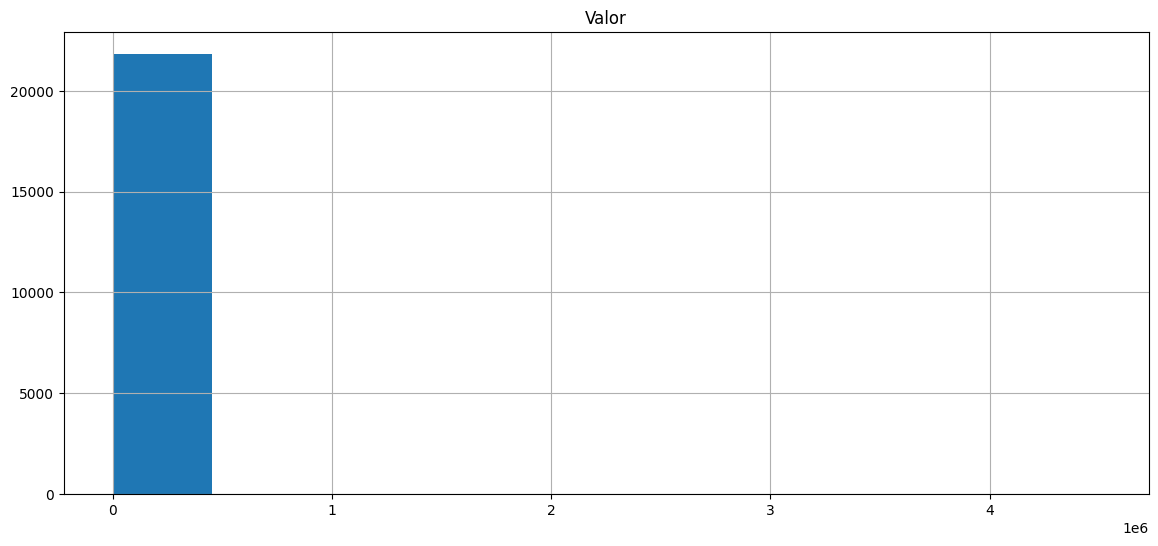

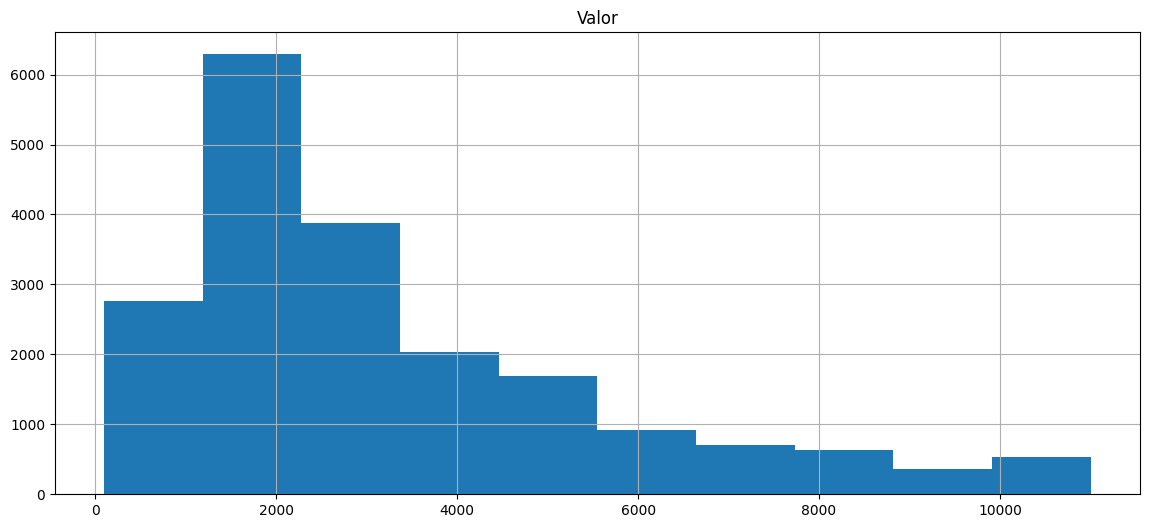

In [254]:
df_res.hist(['Valor'])
dados_new.hist(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

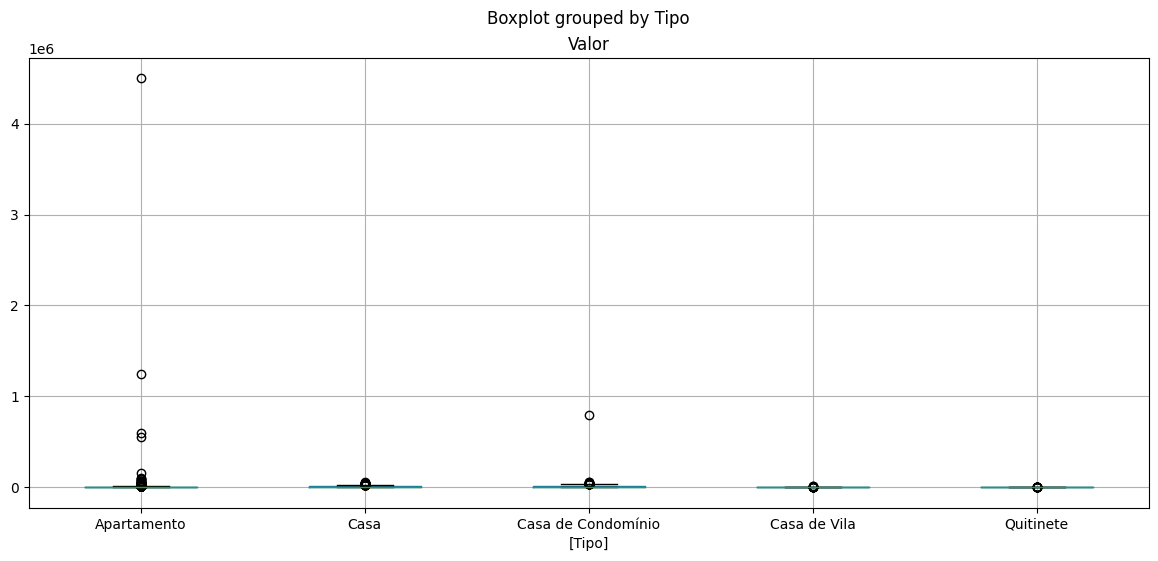

In [255]:
# Identificando e removendo outliers por grupos

df_res.boxplot(['Valor'], by = ['Tipo'])

In [257]:
grupo_tipo = df_res.groupby('Tipo')['Valor']

In [258]:
grupo_tipo.groups

{'Apartamento': [2, 3, 5, 9, 10, 11, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 59, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, ...], 'Casa': [1, 24, 56, 60, 100, 104, 150, 166, 188, 248, 260, 263, 274, 297, 321, 327, 345, 350, 368, 389, 396, 410, 436, 446, 486, 487, 493, 526, 558, 559, 583, 587, 588, 636, 639, 648, 654, 655, 680, 697, 721, 742, 745, 781, 792, 802, 880, 897, 962, 1011, 1059, 1066, 1149, 1154, 1156, 1189, 1211, 1284, 1291, 1354, 1373, 1388, 1409, 1451, 1465, 1469, 1480, 1485, 1513, 1516, 1530, 1630, 1649, 1705, 1711, 1715, 1721, 1734, 1760, 1768, 1815, 1865, 1890, 1930, 1961, 1989, 1998, 2017, 2082, 2102, 2119, 2139, 2165, 2171, 2172, 2199, 2238, 2270, 2273, 2280, ...],

In [259]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [261]:
limite_superior['Apartamento']

9950.0

In [266]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
  istype = df_res['Tipo'] == tipo
  inlimit = (df_res['Valor'] >= limite_inferior[tipo]) & (df_res['Valor'] <= limite_superior[tipo])
  selecao = istype & inlimit
  dados_selecao = df_res[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])


<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

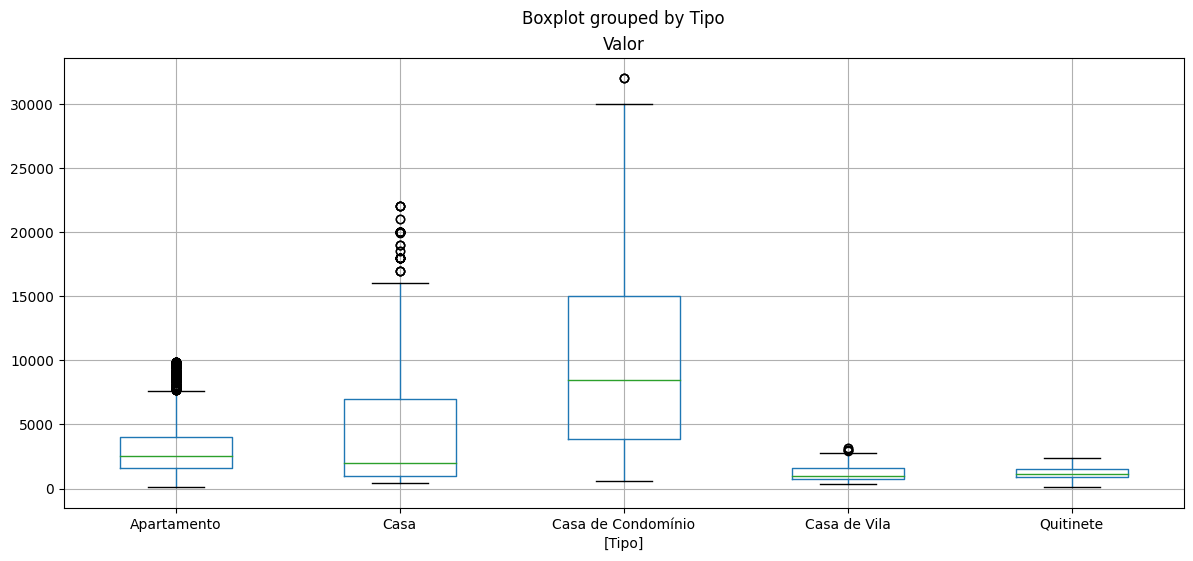

In [267]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [268]:
# Substituir arquivo
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

path = '/content/drive/MyDrive/Colab Notebooks/Alura Pandas Data/aluguel_residencial_sem_outliers.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Mounted at /content/drive
